<a href="https://colab.research.google.com/github/Ductrinh01/AI_Exercises_CNN/blob/main/4_Flowers_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

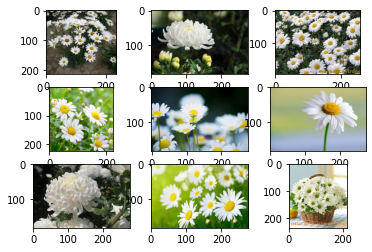

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Data_AI/4_Flowers/CucTrang/'
for i in range(9):
  plt.subplot(330+1+i)
  filename = folder+'CucTrang.'+str(i)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [2]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder1 = '/content/drive/MyDrive/Data_AI/4_Flowers/CucTrang/'
folder2 = '/content/drive/MyDrive/Data_AI/4_Flowers/ThuocDuoc/'
folder3 = '/content/drive/MyDrive/Data_AI/4_Flowers/MatTroi/'
folder4 = '/content/drive/MyDrive/Data_AI/4_Flowers/VanTho/'

photos, labels = list(), list()
for file in listdir(folder1):
  if file.startswith('CucTrang'):
    output = 0
    photo = load_img(folder1+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder2):
  if file.startswith('ThuocDuoc'):
    output = 1
    photo = load_img(folder2+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder3):
  if file.startswith('MatTroi'):
    output = 2
    photo = load_img(folder3+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder4):
  if file.startswith('VanTho'):
    output = 3
    photo = load_img(folder4+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('4flowers_photos.npy', photos)
save('4flowers_labels.npy', labels)

(80, 150, 150, 3) (80,)


In [3]:
photos

array([[[[192., 191., 143.],
         [191., 190., 142.],
         [190., 189., 141.],
         ...,
         [  5.,   8.,   0.],
         [ 13.,  13.,  11.],
         [  5.,   5.,   3.]],

        [[191., 190., 142.],
         [191., 190., 142.],
         [190., 189., 141.],
         ...,
         [ 11.,  14.,   5.],
         [ 15.,  15.,  13.],
         [  8.,   8.,   6.]],

        [[188., 190., 143.],
         [187., 189., 142.],
         [186., 188., 141.],
         ...,
         [ 30.,  33.,  24.],
         [ 21.,  21.,  19.],
         [ 14.,  14.,  12.]],

        ...,

        [[  8.,   9.,   1.],
         [  3.,   9.,   0.],
         [  8.,  20.,   0.],
         ...,
         [  8.,  10.,   7.],
         [ 13.,  15.,  12.],
         [ 12.,  14.,  11.]],

        [[ 13.,  11.,  14.],
         [ 10.,  12.,   9.],
         [ 10.,  18.,   5.],
         ...,
         [ 17.,  19.,  16.],
         [ 12.,  14.,  11.],
         [ 11.,  13.,  10.]],

        [[ 10.,   7.,  14.],
       

In [4]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [6]:
photos = photos.reshape(80,150,150,3)
photos = photos.astype('float32')

photos/=255 # Chia từ ảnh màu thành ảnh xám


In [5]:
from keras.utils                  import np_utils
labels = np_utils.to_categorical(labels,4)


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(27,48),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3),strides=(9,16)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64,kernel_size=(27,48), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu',input_shape=(67500,), name='layer1')) 
model.add(Dense(512, activation='relu', name='layer2'))
model.add(Dense(512, activation='relu', name='layer3'))
model.add(Dense(4, activation='softmax', name='layer4'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 17, 10, 32)        124448    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 5, 64)          2654272   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 layer1 (Dense)              (None, 512)              

In [18]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(photos,labels,epochs = 20)
model.save('4_Flowers.h5')

Epoch 1/20
3/3 [==============================] - 3s 703ms/step - loss: 1.5199 - accuracy: 0.3750
Epoch 2/20
3/3 [==============================] - 2s 676ms/step - loss: 1.4028 - accuracy: 0.3000
Epoch 3/20
3/3 [==============================] - 2s 680ms/step - loss: 1.1932 - accuracy: 0.4250
Epoch 4/20
3/3 [==============================] - 2s 668ms/step - loss: 0.9292 - accuracy: 0.5375
Epoch 5/20
3/3 [==============================] - 2s 631ms/step - loss: 0.7819 - accuracy: 0.6250
Epoch 6/20
3/3 [==============================] - 2s 666ms/step - loss: 0.7924 - accuracy: 0.6500
Epoch 7/20
3/3 [==============================] - 2s 661ms/step - loss: 0.5766 - accuracy: 0.7125
Epoch 8/20
3/3 [==============================] - 2s 667ms/step - loss: 0.6191 - accuracy: 0.7000
Epoch 9/20
3/3 [==============================] - 2s 647ms/step - loss: 0.5100 - accuracy: 0.7625
Epoch 10/20
3/3 [==============================] - 2s 811ms/step - loss: 0.5579 - accuracy: 0.7125
Epoch 11/20
3/3 [==

In [19]:
model.evaluate(photos,labels)

3/3 [==============================] - 1s 151ms/step - loss: 0.2476 - accuracy: 0.9500


[0.2475845068693161, 0.949999988079071]

In [21]:
from keras.models import load_model
models=load_model('4_Flowers.h5')

In [22]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img1 = load_img('ThuocDuoctest.jpg', target_size=(150,150))
img2 = load_img('Cuctest.jpg', target_size=(150,150))
img3 = load_img('MatTroitest.jpg', target_size=(150,150))
img4 = load_img('VanThotest.jpg', target_size=(150,150))

#plt.imshow(img)

In [23]:
import numpy as np
classes = ['Cuc','ThuocDuoc','MatTroi','VanTho']
imgRe = img_to_array(img1)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
#imgre /=255

y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
classes[y_classes[0]]

[[0. 1. 0. 0.]]


'ThuocDuoc'